In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [7]:
lcn = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\python\LungCapData.csv")


In [9]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [11]:
lcn.isnull().sum()[lcn.isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
lcn.Smoke.replace({'no': 0, 'yes': 1}, inplace = True)
lcn.Gender.replace({'male': 0, 'female': 1}, inplace = True)
lcn.Caesarean.replace({'no': 0, 'yes': 1}, inplace = True)

In [15]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
lcn_train, lcn_test = train_test_split(lcn, test_size = 0.2)

In [21]:
lcn_train_x = lcn_train.iloc[:, [1,2,3,4,5]]
lcn_train_y = lcn_train.iloc[:, 0]

lcn_test_x = lcn_test.iloc[:, [1,2,3,4,5]]
lcn_test_y = lcn_test.iloc[:, 0]



In [23]:
#when u run fit it runs a model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(lcn_train_x, lcn_train_y)


LinearRegression()

In [25]:
# Rsquare
Rsquare = linreg.score(lcn_train_x, lcn_train_y)
Rsquare

0.8638237171917977

In [27]:
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]
Adj_Rsq = 1 - (1 - Rsquare) * (N - 1)/(N - K - 1)
Adj_Rsq

0.8626375126377193

In [29]:
#how any model will do the prediction--
# it will build a equation(relation) between x and y
# and using that equation it will do the prediction

linreg.intercept_   #B0

-10.791647772995223

In [31]:
linreg.coef_

array([ 0.16826963,  0.26085846, -0.63154371, -0.38368755, -0.22526369])

In [33]:
pred_train = linreg.predict(lcn_train_x)
pred_train

array([ 4.24060183,  7.59774475, 10.14933533,  9.14631861,  4.55363199,
        9.77831897,  6.0688567 ,  5.89688239,  9.15101091,  2.6332552 ,
        3.96521103,  9.96640329, 11.54073189,  6.66816321,  6.44581311,
        7.25862875,  9.26208544,  6.84158632, 11.48182905, 12.36114768,
        8.38052119,  6.99294792,  3.07829226,  5.7297407 ,  5.40495599,
        9.94547092,  9.73163067, 10.42306603,  5.0935035 , 10.13724966,
        6.92208948,  6.00862487,  7.33946303,  8.24058303,  6.88121236,
        7.52464069,  7.43898405,  2.46174087,  5.53538522,  5.80555157,
        8.32768846, 11.47680564,  7.20678817,  7.98857246,  5.3190983 ,
        6.24630415, 11.60723487,  8.18338792,  6.18495464,  7.85444881,
        7.60276816,  6.88669576, 10.14900422, 10.50007582,  3.53608294,
        9.45228651,  9.74840864,  6.45512099,  3.25171536, 10.79857364,
       10.40761705,  8.87839789,  9.82164277,  4.55085421,  8.82377953,
        7.52451062,  9.55160649,  6.31986939,  9.4094227 ,  3.11

In [35]:
err_train = lcn_train_y - pred_train   #(actual - predicted)
err_train


169    0.084398
244    1.902255
521   -0.299335
377   -0.521319
490   -0.303632
         ...   
96    -2.266159
260    0.687675
7     -2.098754
349    1.294428
695   -0.696810
Name: LungCap, Length: 580, dtype: float64

In [37]:
# Checking asumption
#  Asumption are alwys checked on train data
# mean of ur error term should be closw to 0 if not exactly 0
# error term

In [39]:
err_train.mean()

-2.6859740485414133e-15

In [43]:
1.1576946298160252e-15 < 0.0000000000001

True

In [45]:
err_train.skew()

-0.08926109669406253

In [47]:
err_train.kurtosis() + 3

2.668740741458238

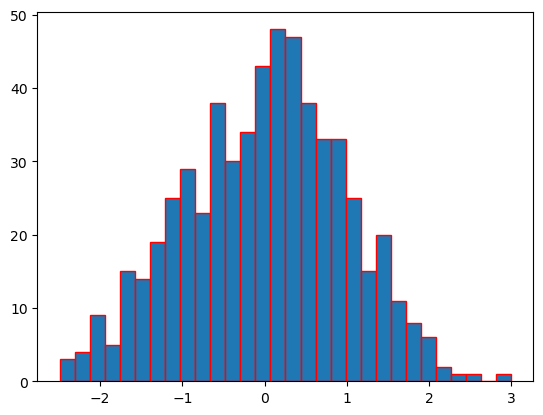

In [49]:
import matplotlib.pyplot as plt

plt.hist(err_train, bins = 30, edgecolor = 'red')
plt.show()

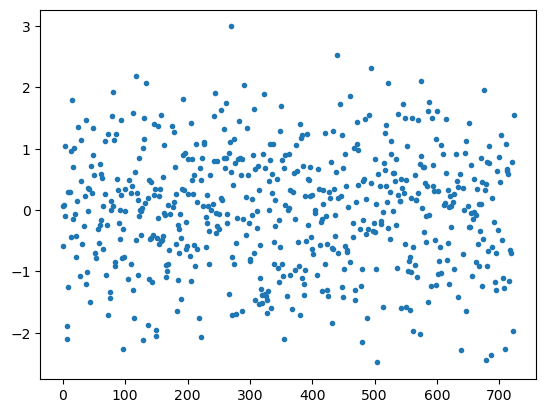

In [51]:
plt.plot(err_train,'.')
#erros main pattern nhi hona chahiye

In [53]:
import seaborn as sns

<Axes: ylabel='LungCap'>

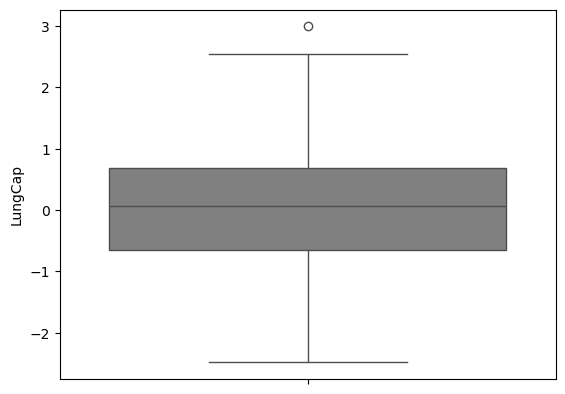

In [55]:
sns.boxplot(err_train, color='grey')

In [57]:
#homoscedasticity :- variance around the regression line is same for all predicted values

In [59]:
actual_pred = pd.DataFrame()
actual_pred["Actual"] = lcn_train_y
actual_pred["Predicted"] = pred_train

In [61]:
actual_pred

,Actual,Predicted
169,4.325,4.240602
244,9.500,7.597745
521,9.850,10.149335
377,8.625,9.146319
490,4.250,4.553632
...,...,...
96,7.550,9.816159
260,8.850,8.162325
7,7.325,9.423754
349,8.475,7.180572


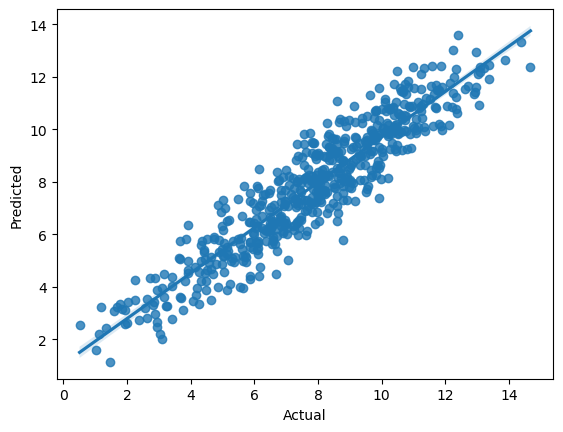

In [63]:
sns.regplot(x = "Actual", y = "Predicted", data = actual_pred)
plt.show()

In [65]:
# no points should be away frm line
import numpy as np
#MSE
np.mean(np.square(err_train))

0.9378519780233503

In [67]:
#MSE
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(lcn_train_y, pred_train)
mse_train

0.9378519780233503

In [69]:
rmse_train = np.sqrt(mse_train)
rmse_train

0.9684275801645419

In [71]:
# Mape
np.mean(np.abs(err_train * 100/ lcn_train_y))

13.005963430192727

In [73]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(lcn_train_y, pred_train) * 100

13.005963430192727

In [75]:
# Evaluate our model on test

pred_test = linreg.predict(lcn_test_x)
err_test = lcn_test_y - pred_test

In [77]:
mean_absolute_percentage_error(lcn_test_y, pred_test) * 100

15.313156451619966

In [79]:
err_test

239    1.345616
636    0.508809
506   -2.239645
296    0.554377
66    -0.137994
         ...   
610   -1.150671
256    0.889701
105    0.272605
523   -1.257035
240   -0.047453
Name: LungCap, Length: 145, dtype: float64